# Genre Classification Project: Text Preprocessing

This notebook focuses on the text preprocessing steps necessary for preparing the data for model building.

## Contents
1. **Lowercasing**: Converting all text data to lowercase to ensure uniformity.
2. **Removing Unnecessary Elements**: Cleaning the text by removing punctuation, special characters, and other irrelevant elements.
3. **Removing Stopwords**: Filtering out common stopwords to reduce noise in the data.
4. **Stemming**: Applying stemming to reduce words to their root forms, helping to standardize variations of words.

These preprocessing steps are crucial for enhancing the quality of the text data, making it more suitable for the subsequent stages of the genre classification project.


In [1]:
import numpy as np
import pandas as pd

In [2]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [3]:
import matplotlib.pyplot as plt

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
df = pd.read_csv("data/movie-genre-classification-train.csv")
df.head()

,title,genre,description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


## Preprocessing

In [30]:
# Converting all documents to lowercase
df['cleaned_text'] = df['description'].str.lower()

In [31]:
# Removing all twitter mentions form documents
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'@\S+','',x))

In [32]:
# Removing all urls from ducuments
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'http\S+', '', x))

In [33]:
# Removing all pics from ducuments
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'pic.\S+', '',x))

In [34]:
# keep only english chars / remove numbers from ducuments
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'[^a-zA-Z+]', ' ', x))

In [35]:
def remove_puctuations(text):
    l = []
    for i in text:
        if i not in string.punctuation:
            l.append(i)
    return "".join(l)

In [36]:
# Removing puctuations from all ducuments
df['cleaned_text'] = df['cleaned_text'].apply(remove_puctuations)

In [37]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Stop word removal

In [38]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    words = nltk.word_tokenize(text)

    l = []
    for i in words:
        if i not in stopwords and len(i) > 2:
            l.append(i)
    return " ".join(l)

In [39]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

In [40]:
# Removing repeated/leading/trailing spaces
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub("\s[\s]+", " ",x).strip())

In [41]:
df.head()

,title,genre,description,cleaned_text
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...


## Stemming

In [42]:
stemmer = PorterStemmer()
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: stemmer.stem(x))

In [43]:
df["description"][0]

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In [44]:
df["cleaned_text"][0]

'listening conversation doctor parents year old oscar learns nobody courage tell weeks live furious refuses speak anyone except straight talking rose lady pink meets hospital stairs christmas approaches rose uses fantastical experiences professional wrestler imagination wit charm allow oscar live life love full company friends pop corn einstein bacon childhood sweetheart peggy blu'

## Analyzing Original text and cleaned text

In [45]:
df['description'].apply(len).values.mean()

600.4524292618142

In [46]:
df['cleaned_text'].apply(len).values.mean()

405.18521046224225

Text(0, 0.5, 'Frequency')

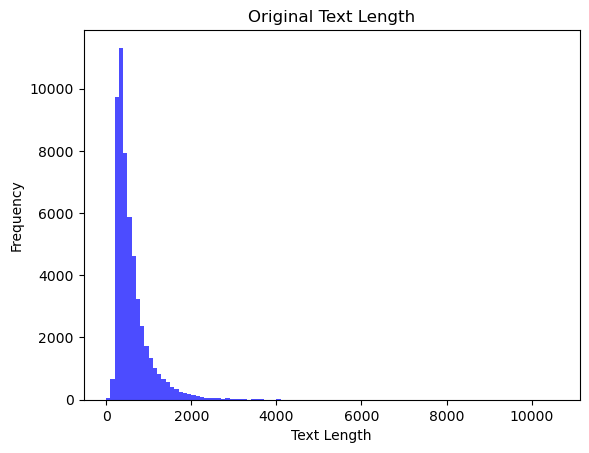

In [47]:
original_lengths = df['description'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='blue', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

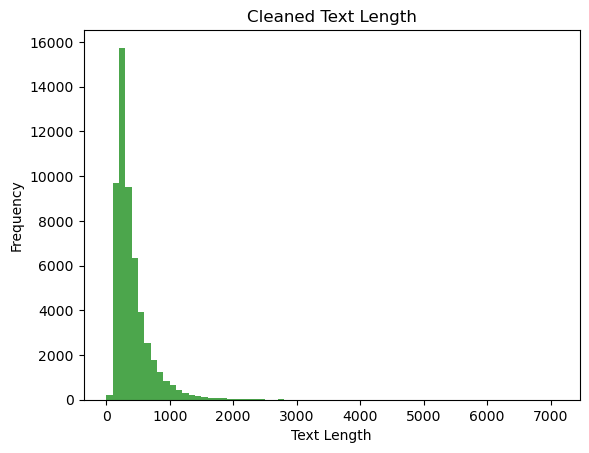

In [48]:
original_lengths = df['cleaned_text'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='green', alpha=0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

In [50]:
df.to_csv("data/movie-genre-classification-preprocessed.csv", index=False)